## Базовый вычислительный эксперимент

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn
import scipy.stats as stats
from sklearn.svm import LinearSVC
import scipy as sp
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import mahalanobis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from scipy.linalg import fractional_matrix_power
%matplotlib inline
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

matplotlib.rc('font', **font)

In [7]:
def KL_div_norm(dist1,dist2):
    mean1 = np.mean(dist1, axis=0)
    cov1 = np.cov(dist1, rowvar=0)
    mean2 = np.mean(dist2, axis=0)
    cov2 = np.cov(dist2, rowvar=0)
    #div = np.exp(-0.5*np.dot(np.dot(mean1-mean2,np.linalg.inv(cov1+cov2)),mean1-mean2))
    div = 0.5*(np.trace(np.dot(np.linalg.inv(cov2),cov1)) + np.dot(np.dot((mean2-mean1),np.linalg.inv(cov2)),(mean2-mean1)) - cov2.shape[0] + np.log(np.linalg.det(cov2)/np.linalg.det(cov1)))
    return div

In [8]:
def get_param_distr(X,y,n,count=50):
    l = X.shape[0]
    C = 1
    distr=[]
    losses = 0 
    clf0 = LogisticRegression(C=C, random_state=0)
    clf0.fit(X,y)
    for i in range(0,count):
        choice = np.random.choice(range(0,l), n)
        clf = LogisticRegression(C=C, random_state=0)
        while not((0 in y[choice])and(1 in y[choice])):
            choice = np.random.choice(range(0,l), n)
        clf.fit(X[choice],y[choice])
        coef = clf.coef_
        distr.append(coef[0])
        losses += sklearn.metrics.log_loss(y,clf.predict_proba(X))
    return np.asarray(distr), losses

In [9]:
f = open("../data/Liver/Data.txt")
g = open("../data/heart")

FileNotFoundError: [Errno 2] No such file or directory: '../data/Liver/Data.txt'

In [10]:
data_h = []
for line in g:
    data_h.append(list(map(float, line.replace(","," ").replace("\n","").split())))
data_h = np.asarray(data_h)
data_h = data_h[:,[0,3,4,7,9,11,13]]
np.random.shuffle(data_h)
X_h=data_h[:,:-1]
X_h = preprocessing.scale(X_h[:,:-1])
y_h=data_h[:,-1]-np.ones(data_h[:,-1].shape[0])

NameError: name 'g' is not defined

In [11]:
data_l = []
for line in f:
    data_l.append(list(map(float, line.replace(","," ").replace("\n","").split())))
data_l = np.asarray(data_l)
np.random.shuffle(data_l)
X_l=data_l[:,:-1]
X_l = preprocessing.scale(X_l[:,:-1])
y_l=data_l[:,-1]-np.ones(data_l[:,-1].shape[0])

NameError: name 'f' is not defined

In [12]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
train = preprocessing.scale(data['data'])

In [13]:
random_state = 0
#X, X_t, y, y_t = train_test_split(train[:,:10], data.target, test_size=0.3, random_state=random_state)
#X, X_t, y, y_t = train_test_split(X_l, y_l, test_size=0.4, random_state=random_state)
X, X_t, y, y_t = train_test_split(X_h, y_h, test_size=0.2, random_state=random_state)

NameError: name 'X_h' is not defined

In [14]:
X_h.shape

NameError: name 'X_h' is not defined

In [15]:
C=1
start = 10
ratios = []
k = y_t.shape[0]
accuracy = []
for n in range(start, y.shape[0]):
    clf = LogisticRegression(C=C, random_state=random_state)
    clf.fit(X[:n],y[:n])
    y_pred = clf.predict(X[:n])
    y_pred_t = clf.predict(X_t[:k])
#     ratios.append(roc_auc_score(y_t[:k],y_pred_t)/roc_auc_score(y[:n],y_pred))
    accuracy.append(np.sum(y_pred_t[:k]==y_t[:k])/k)

NameError: name 'y_t' is not defined

In [16]:
# plt.plot(ratios)
plt.plot(accuracy, lw = 5)
plt.xlabel('m', fontsize=20)
plt.ylabel('Test accuracy', fontsize=20)
plt.show()

NameError: name 'accuracy' is not defined

на тесте с 70 отснаовилась точность на трейне оптимизм падал с 0 до 40 потом пошло нормлаьно, больше семплить

In [17]:
# start = 20
# Vs = []
# Ds = []
# Gs = []

# for n in range(start, y.shape[0]):
#     XX = X_l[:n,:-1]
#     I = np.dot(np.transpose(XX),XX)
#     I1 = np.linalg.inv(I)
#     Vs.append(np.trace(I1))
#     Ds.append(np.linalg.det(I1))
#     Gs.append(np.max(np.diag(np.dot(np.dot(XX,I1),np.transpose(XX)))))
# plt.plot(Vs)
# plt.plot(Ds)
# plt.plot(Gs)

In [18]:
distributions = []
losses = []
start = 24
stop = 100
volume = 200
for n in range(start, volume-1):
    dis, loss = get_param_distr(X[:n],y[:n],n-n//4,count = 300)
    distributions.append(dis)
    losses.append(loss)

NameError: name 'X' is not defined

In [19]:
mlist = [(len(distributions)//4)*i for i in range(1,5)]

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


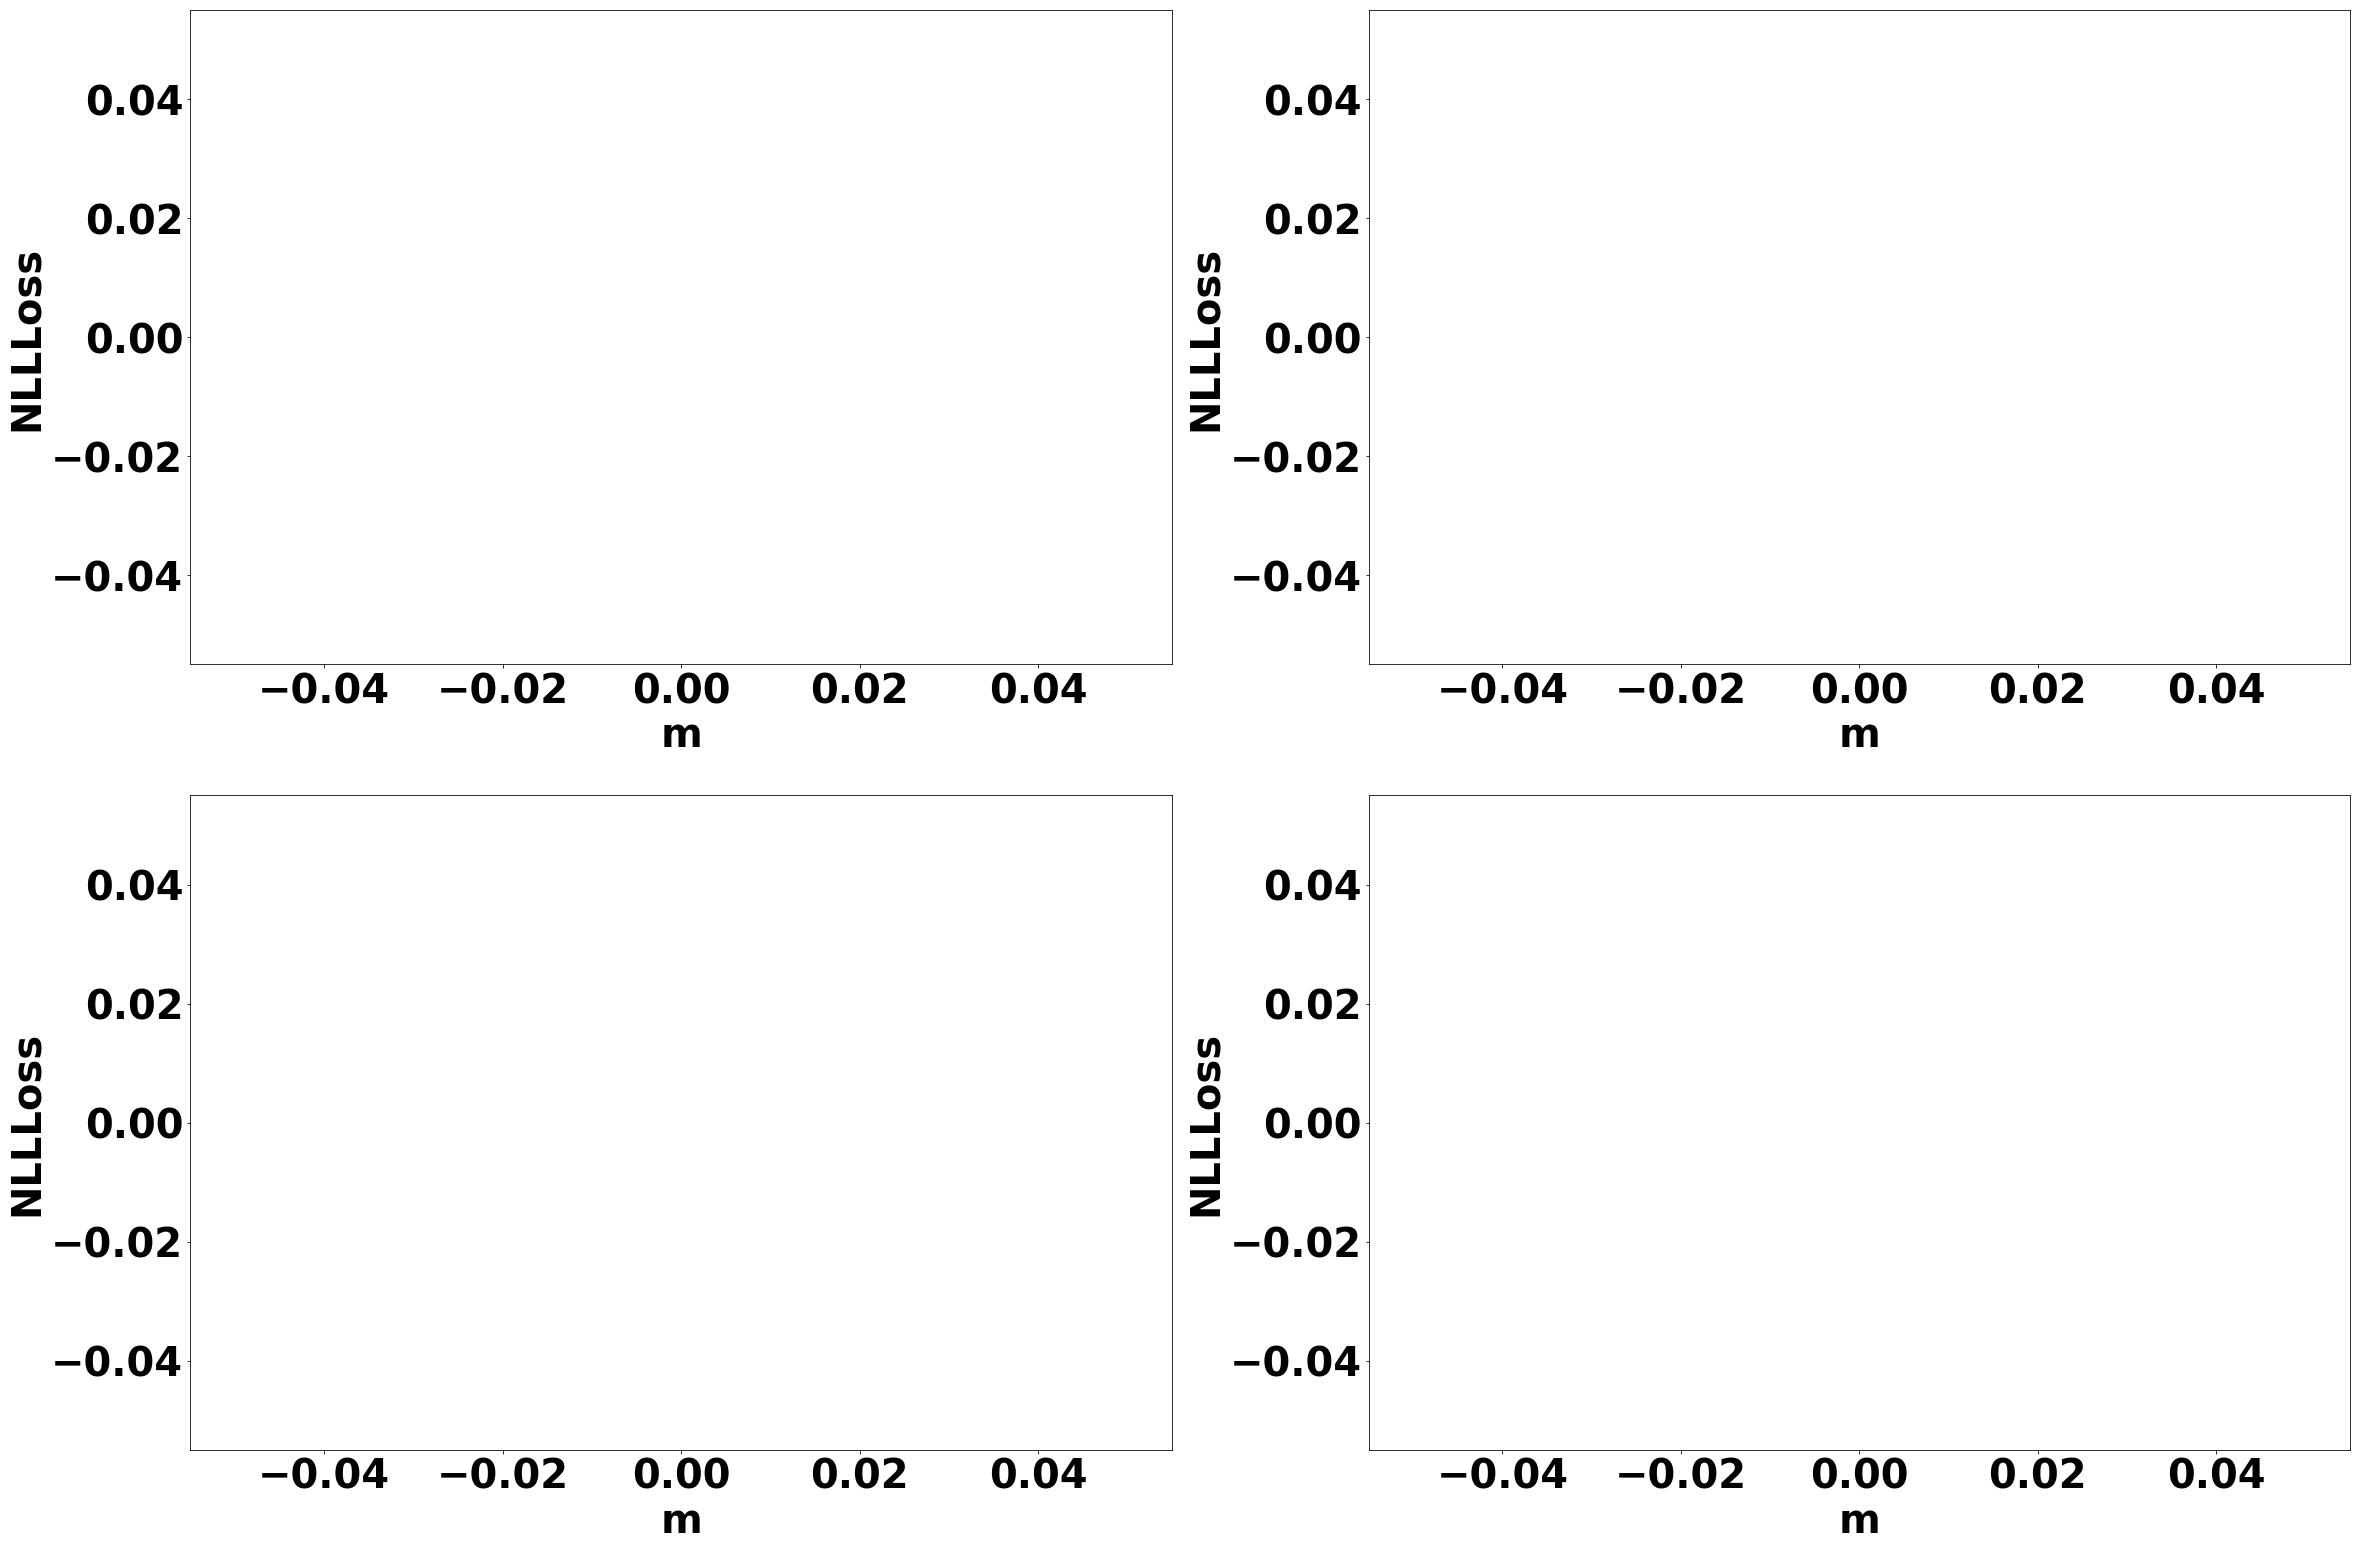

In [20]:
k = 0
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0,right =5,bottom = 0, top=5)

for m in mlist:
    dev=[]
    ax = axs[k//2, k%2]
    euclid = []
    k = k+1
    ax.set_autoscale_on(True)
    ax.set_ylabel('NLLLoss',fontdict=font)
    ax.set_xlabel('m',fontdict=font)
    ax.plot(losses[:m],lw=12, color='blue')  
plt.show()
# for m in mlist:
#     plt.figure()
#     plt.plot(losses[:m],lw=5, color='blue')
#     plt.xlabel('m', fontsize=18)
#     plt.ylabel('Losses', fontsize=16)
#     plt.show()


/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


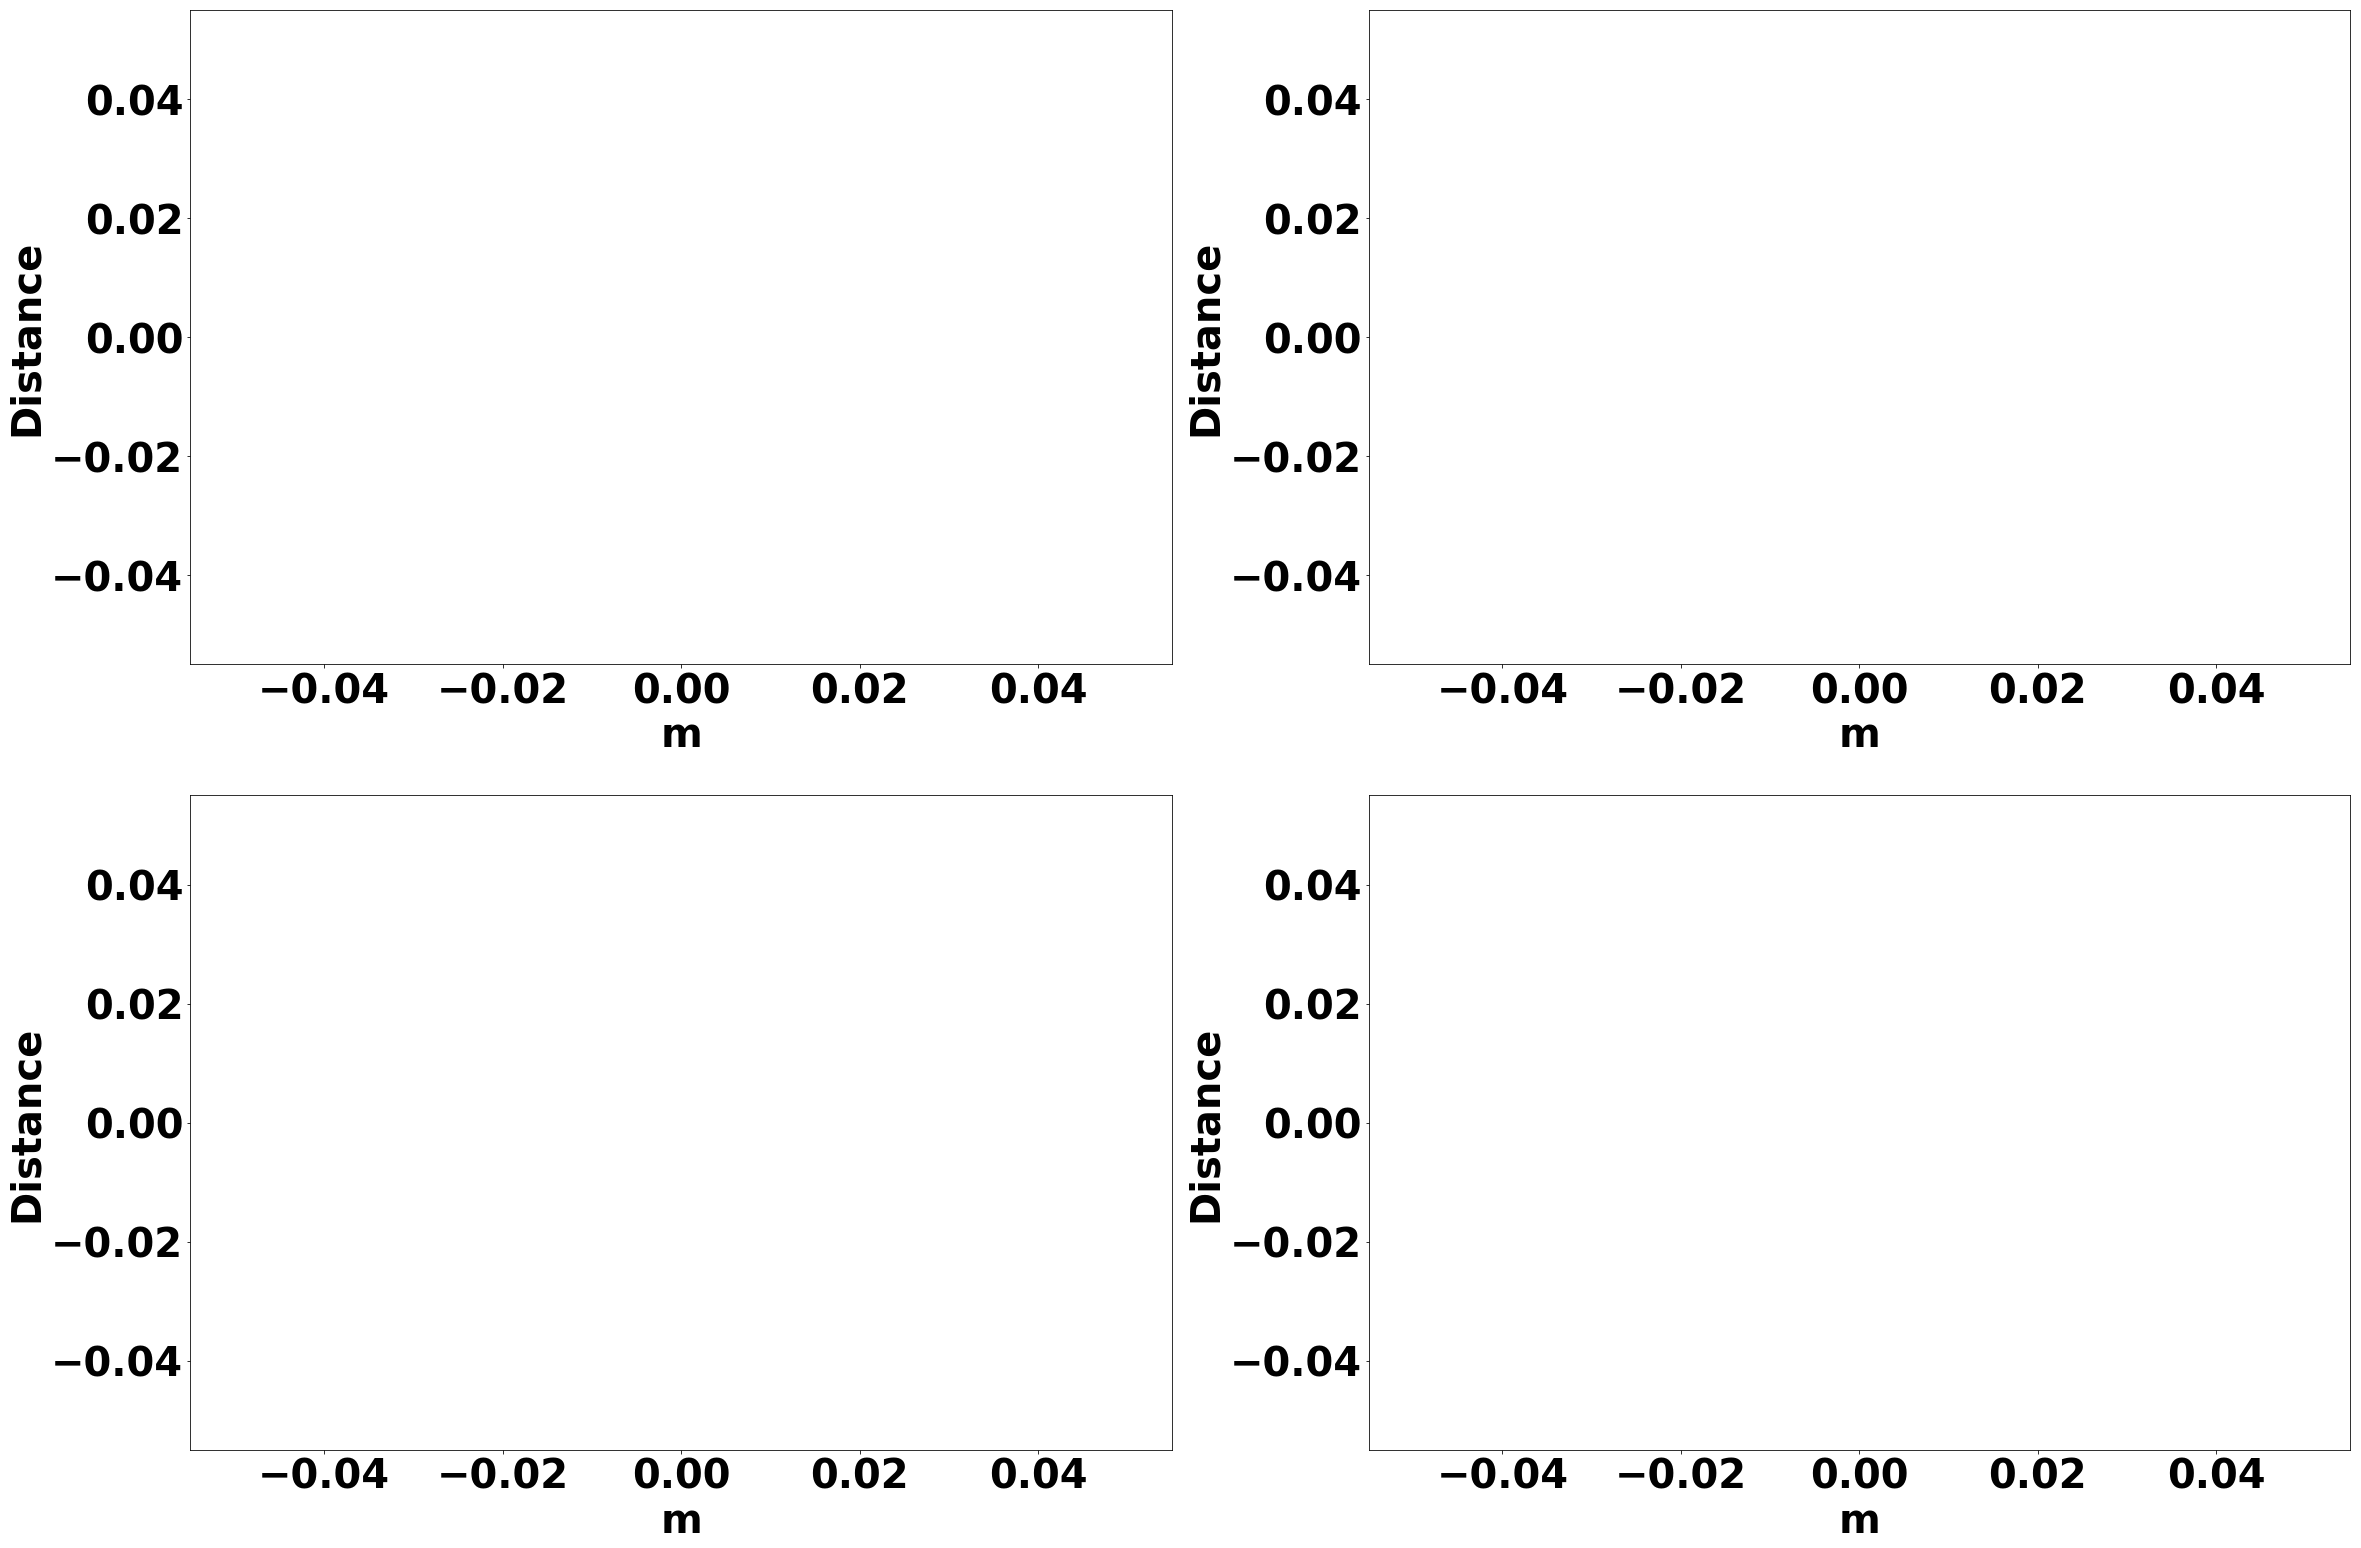

In [21]:
k = 0
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0,right =5,bottom = 0, top=5)

for m in mlist:
    dev=[]
    ax = axs[k//2, k%2]
    euclid = []
    for i in range(0,m,2):
        w1 = np.mean(distributions[i],0)
        w2 = np.mean(distributions[i+1],0)
        euclid.append(np.linalg.norm(w1-w2))
    k = k+1
    ax.set_autoscale_on(True)
    ax.set_ylabel('Distance',fontdict=font)
    ax.set_xlabel('m',fontdict=font)
    ax.plot(euclid[:m],lw=12, color='blue')  
plt.show()
# for m in mlist:
#     euclid = []
#     for i in range(0,m):
#         w1 = np.mean(distributions[i],0)
#         w2 = np.mean(distributions[m],0)
#         euclid.append(np.linalg.norm(w1-w2))
#     plt.plot(euclid[:m],lw=5, color='blue')
#     plt.xlabel('m', fontsize=18)
#     plt.ylabel('Distance', fontsize=16)
#     plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


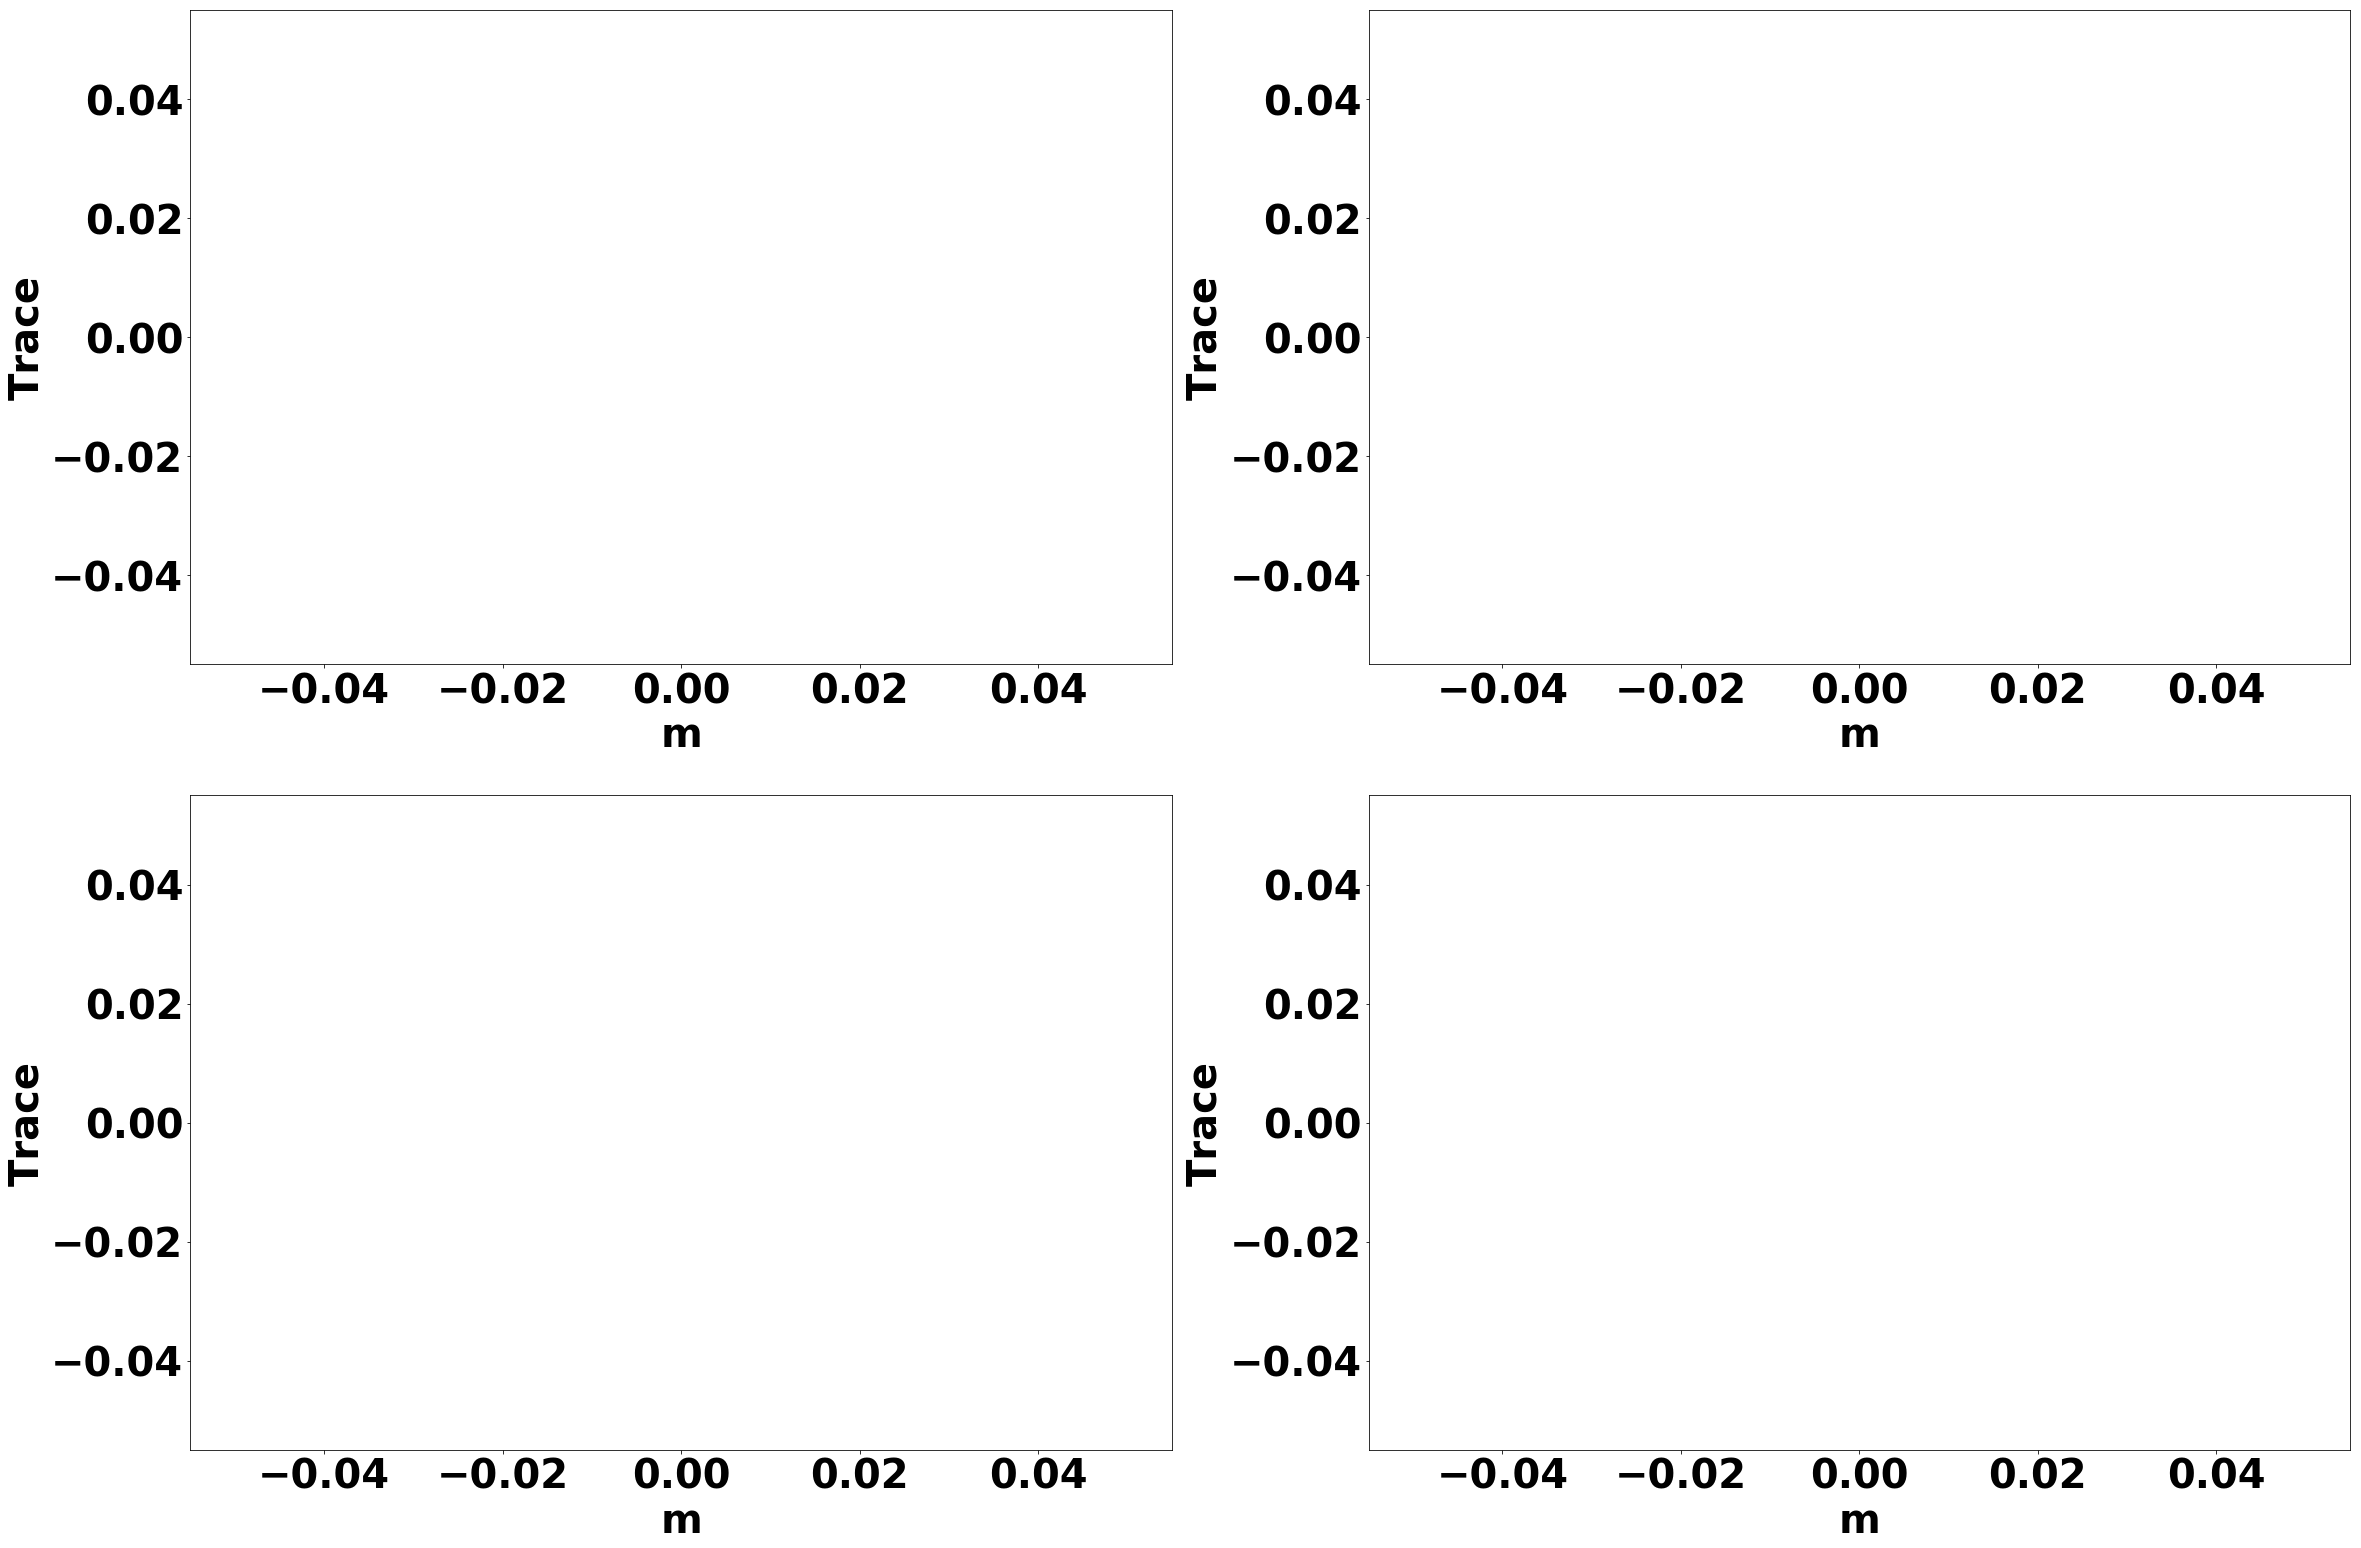

In [22]:
k = 0
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0,right =5,bottom = 0, top=5)

for m in mlist:
    dev=[]
    ax = axs[k//2, k%2]
    for i in range(0,m):
        dev.append(np.trace(np.cov(distributions[i],rowvar=0)))
    k = k+1
    ax.set_autoscale_on(True)
    ax.set_ylabel('Trace',fontdict=font)
    ax.set_xlabel('m',fontdict=font)
    ax.plot(dev[:m],lw=12, color='blue')  
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


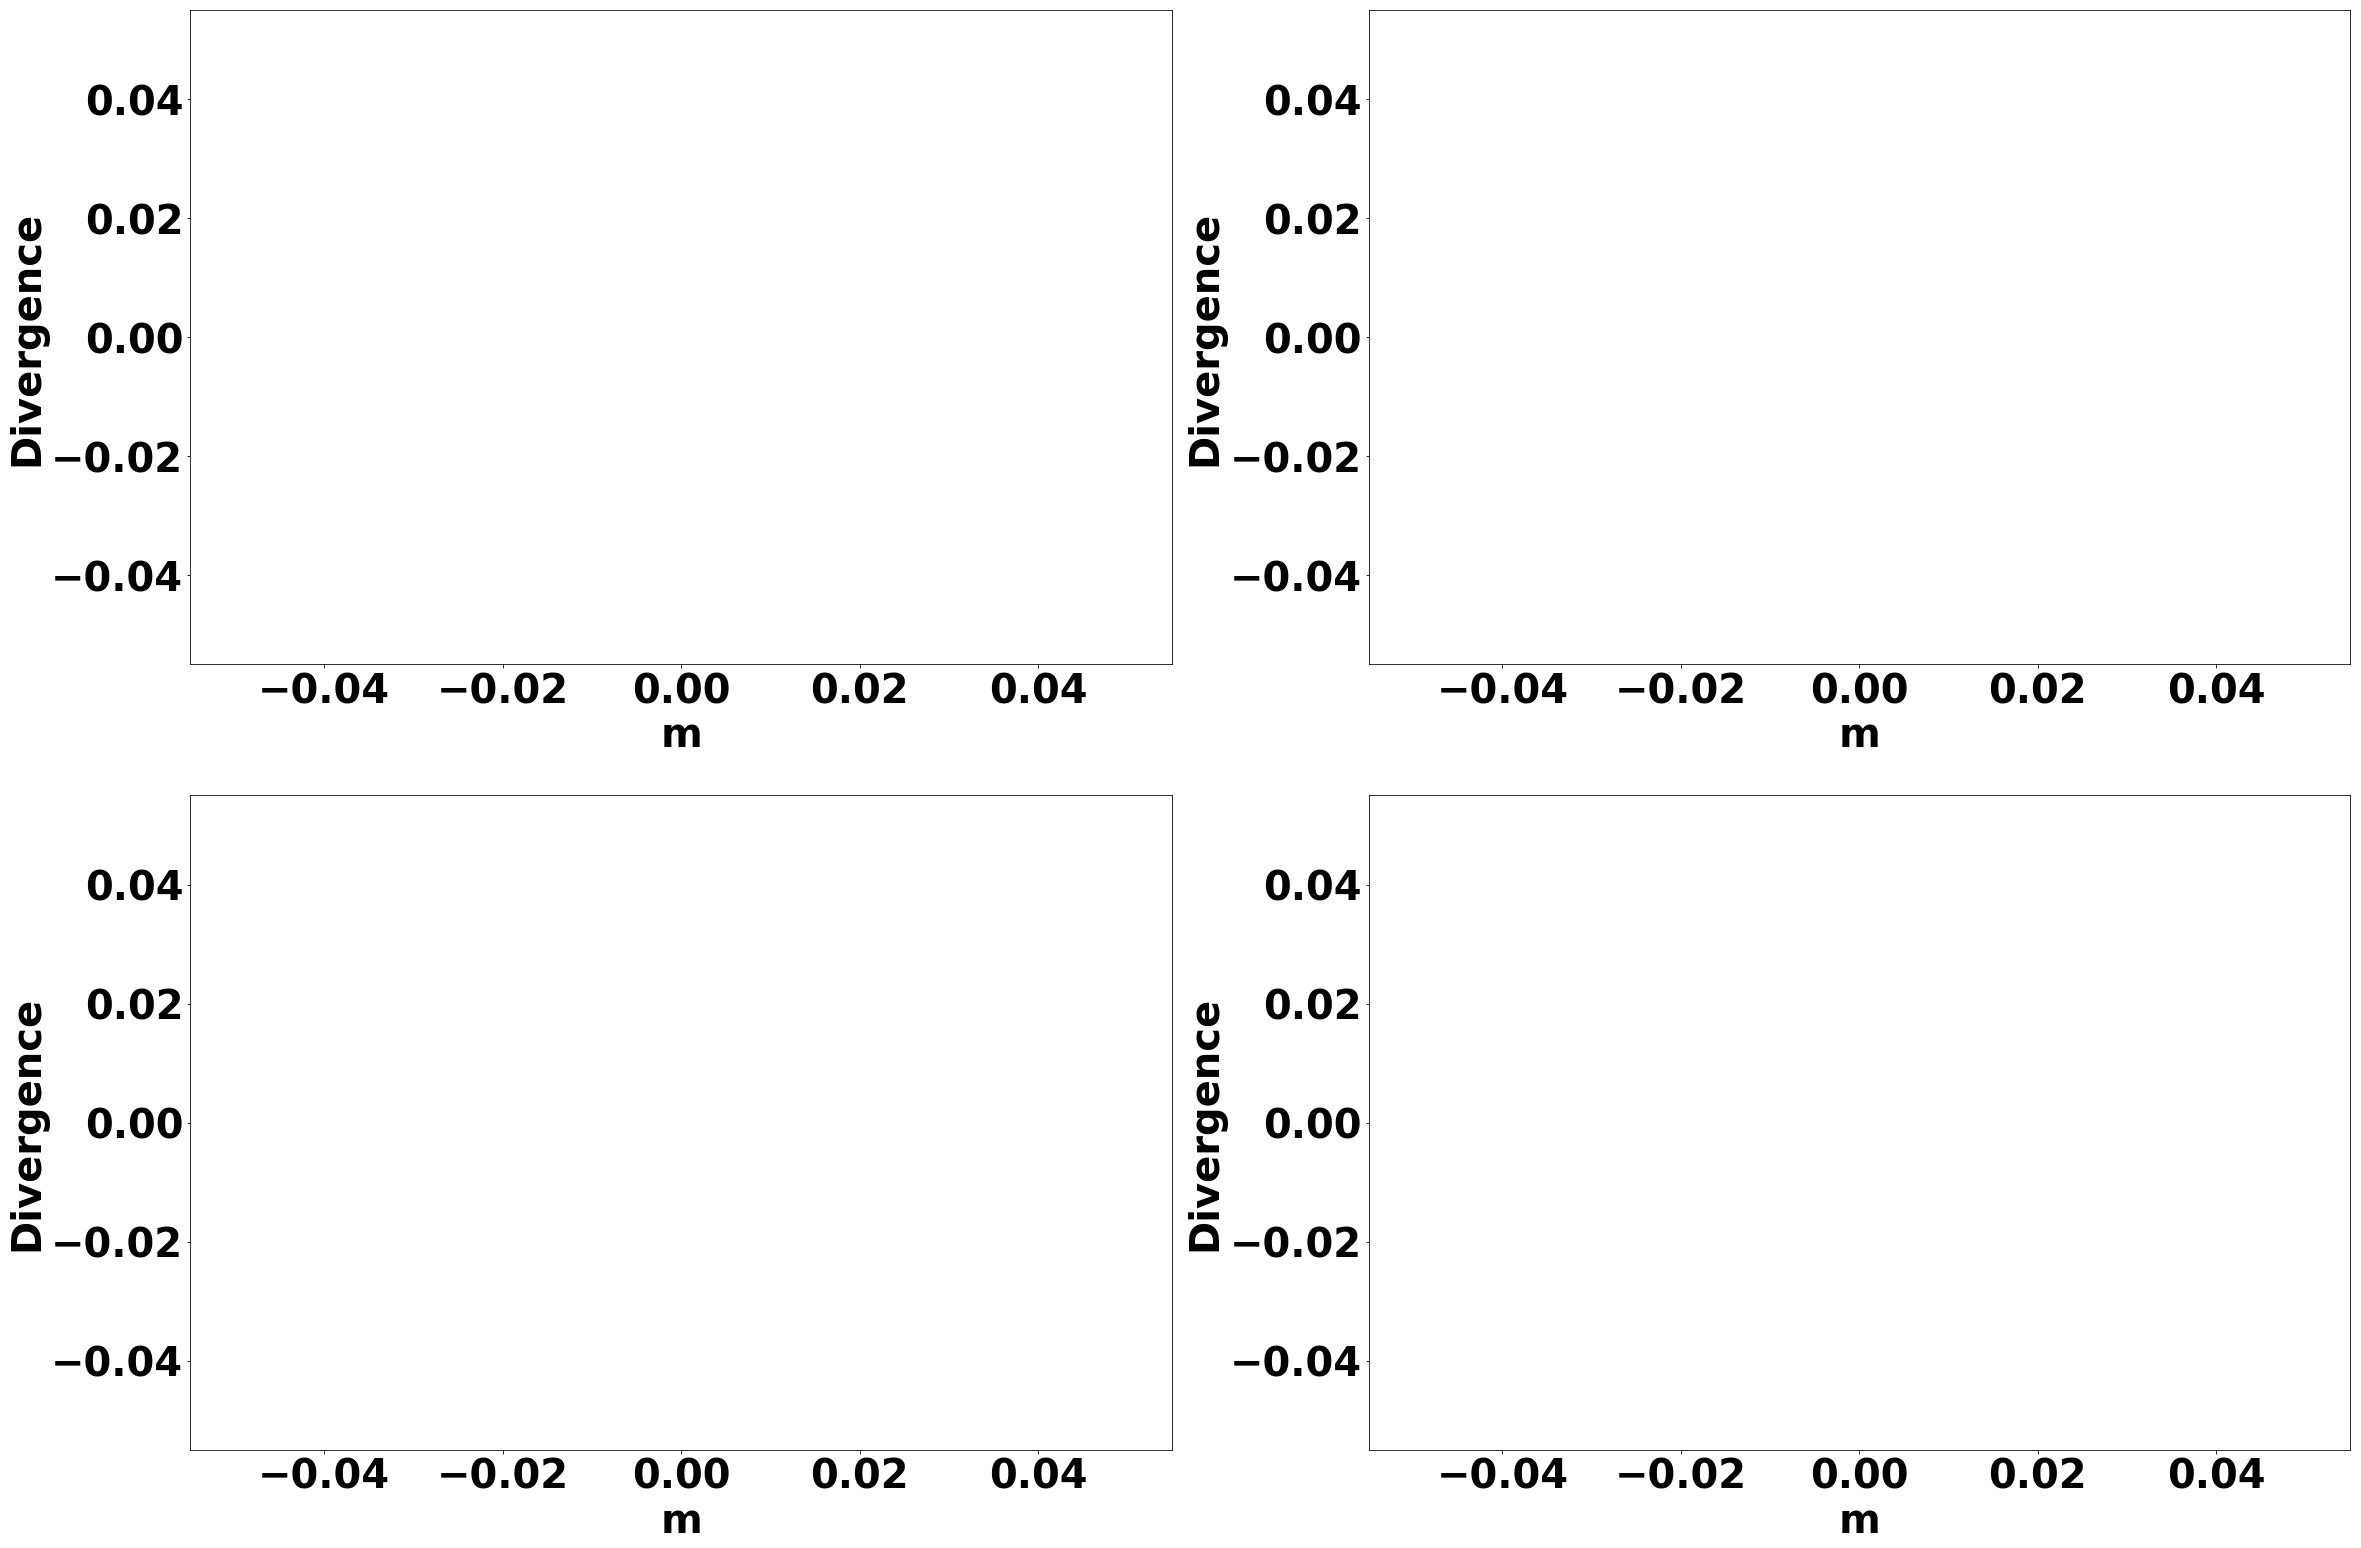

In [23]:
k = 0
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0,right =5,bottom = 0, top=5)

for m in mlist:
    divergence=[]
    ax = axs[k//2, k%2]
    for i in range(0,m):
        divergence.append(KL_div_norm(distributions[i],distributions[m]))
    k = k+1
    ax.set_autoscale_on(True)
    ax.set_ylabel('Divergence',fontdict=font)
    ax.set_xlabel('m',fontdict=font)
    ax.plot(divergence[:m],lw=12, color='blue')  
plt.show()

/home/tamaz/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


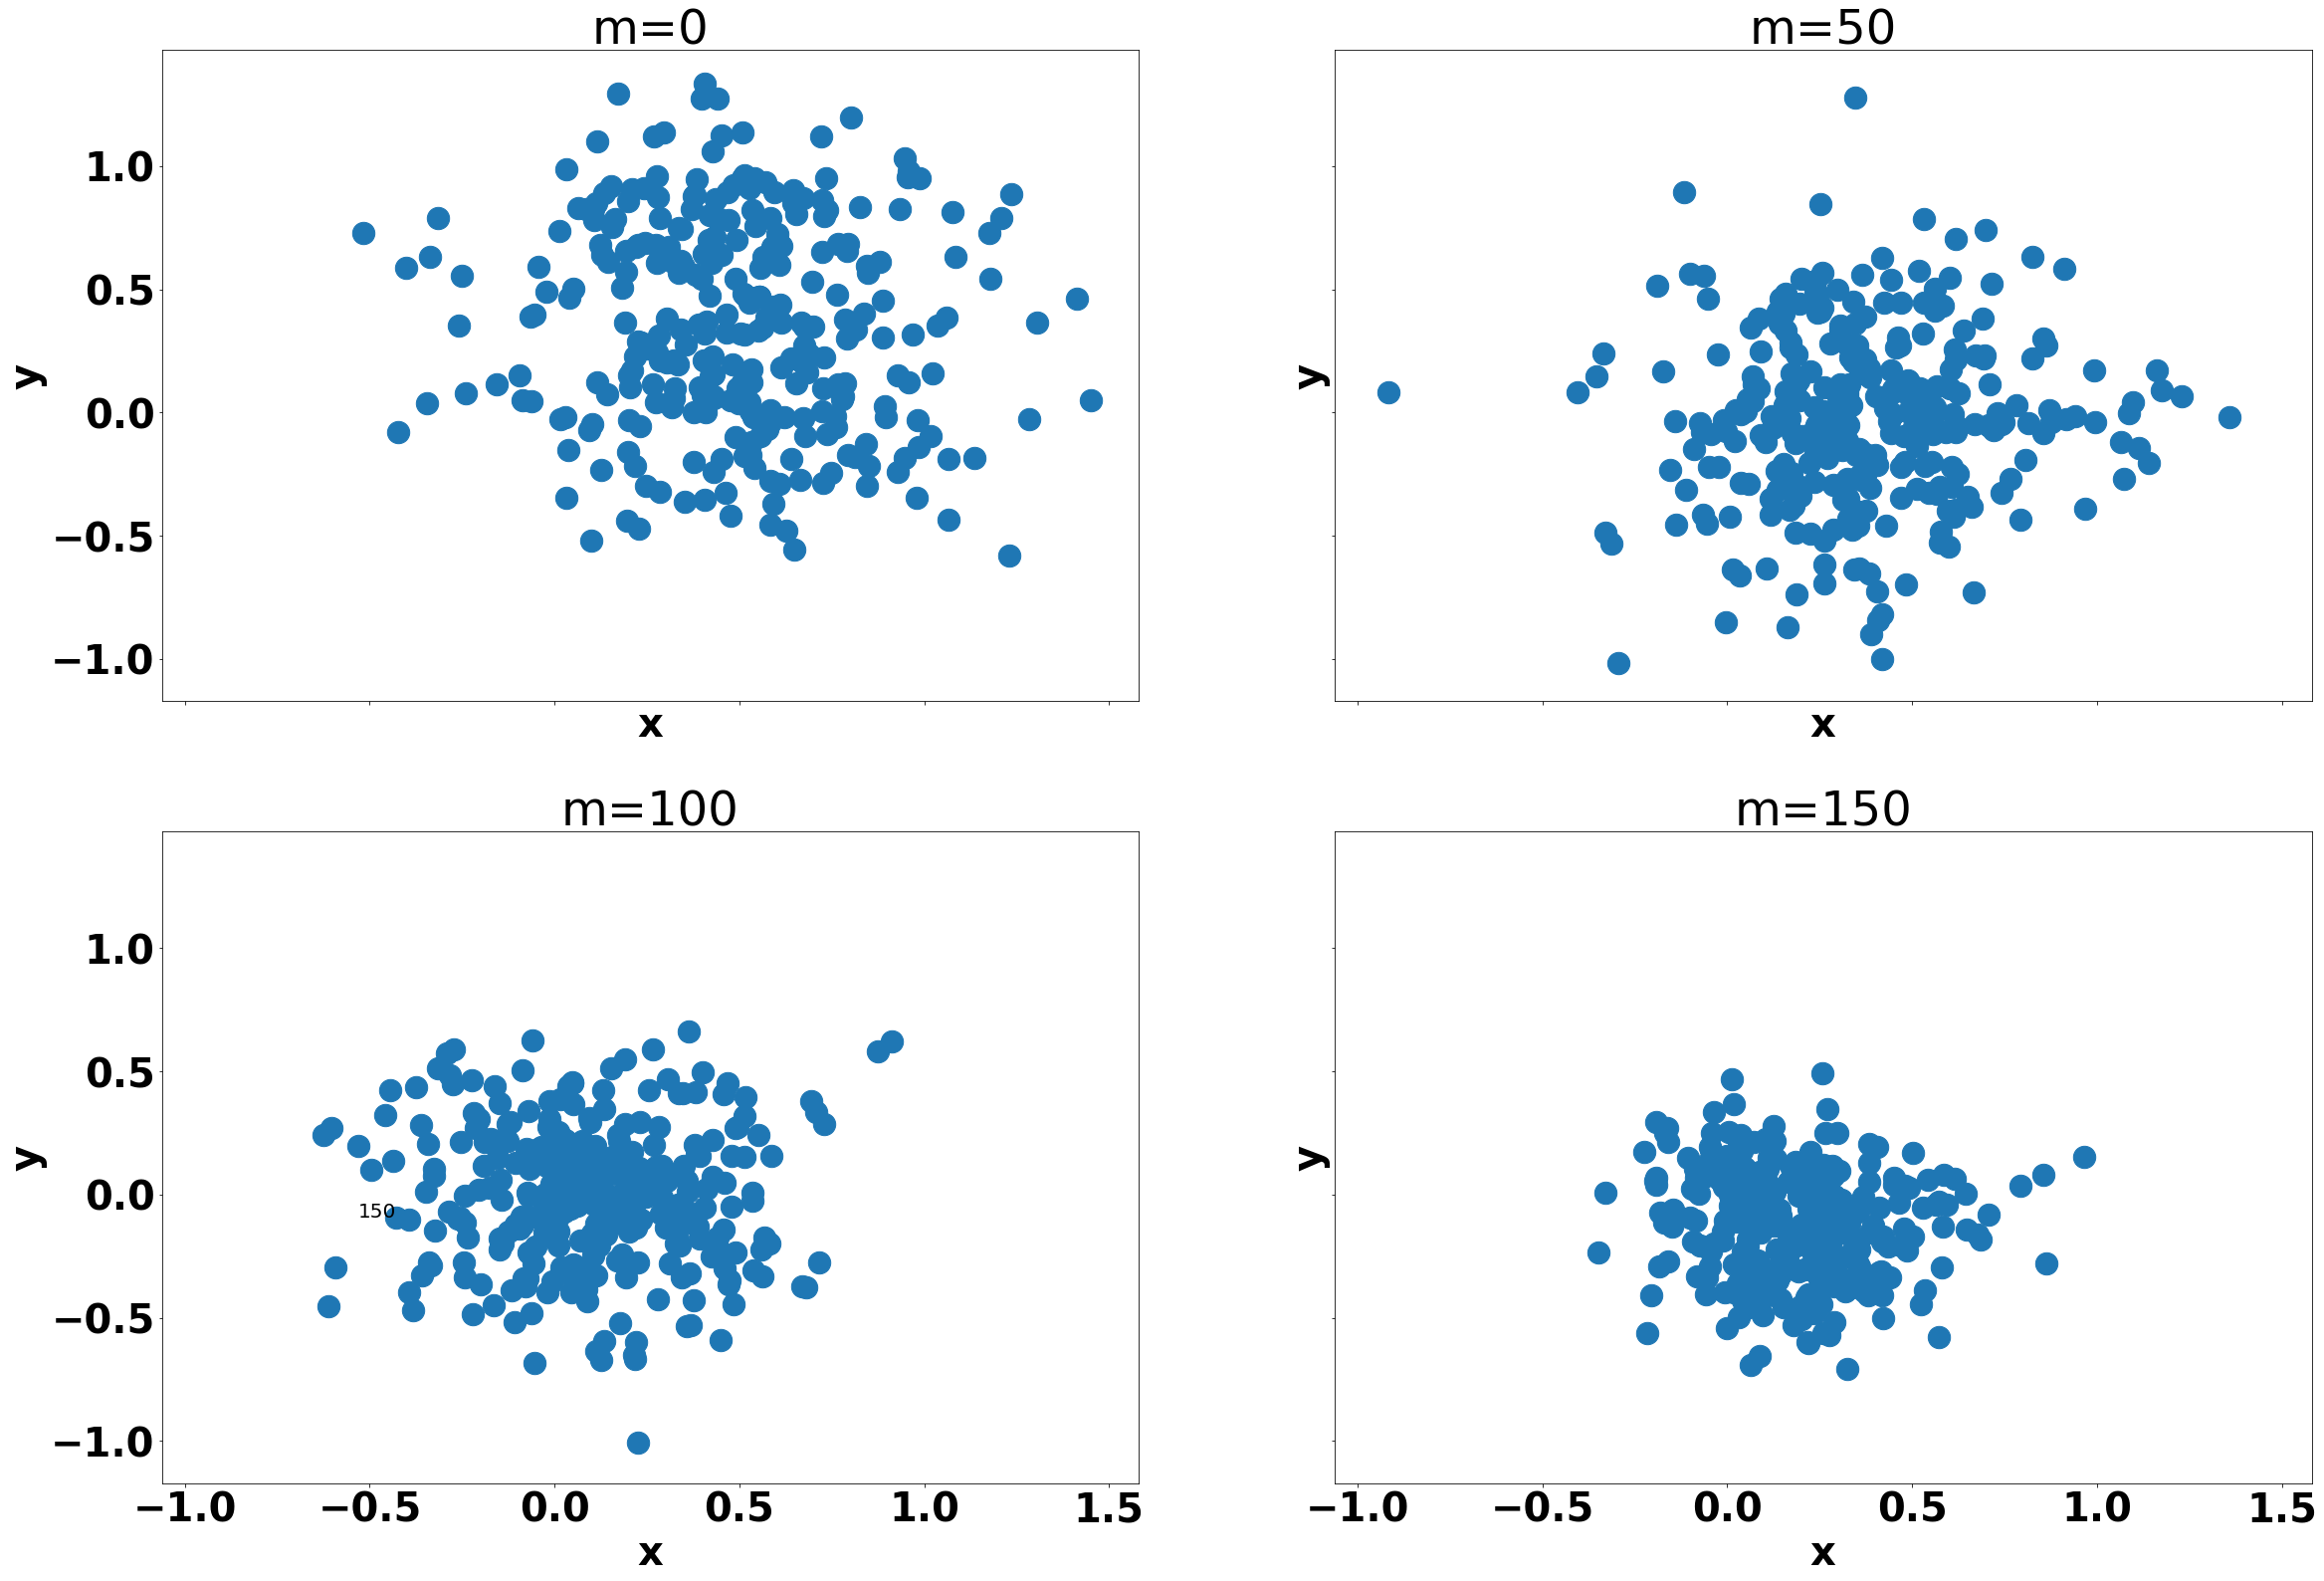

In [183]:
k = 0
fig, axs = plt.subplots(2, 2,sharex=True,sharey=True)
fig.subplots_adjust(left=0,right =5,bottom = 0, top=5)
for i in range(0,187,50):
    fig.suptitle(''+str(i), fontsize=20)
    ax = axs[k//2, k%2]
    k = k+1
    ax.set_autoscale_on(True)
    ax.set_title("m="+str(i))
    ax.set_ylabel('y',fontdict=font)
    ax.set_xlabel('x',fontdict=font)
    ax.scatter(distributions[i][:,2],distributions[i][:,0],500)
plt.show()


# for m in mlist:
#     ax = axs[k//2, k%2]
#     k = k+1
#     ax.set_autoscale_on(True)
#     ax.set_ylabel('y',fontdict=font)
#     ax.set_xlabel('x',fontdict=font)
#     ax.scatter(means[:,(k*k+1)%5],means[:,k%5],1000,c = np.asarray([i for i in range(means.shape[0])]),linewidth=14)  
# plt.show()


(array([ 2., 10., 14., 25., 32., 49., 42., 19.,  4.,  3.]),
 array([-1.17662679, -0.9824151 , -0.78820341, -0.59399173, -0.39978004,
        -0.20556835, -0.01135666,  0.18285502,  0.37706671,  0.5712784 ,
         0.76549009]),
 <a list of 10 Patch objects>)

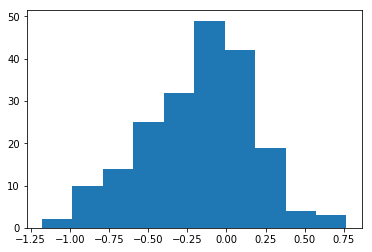

In [27]:
plt.hist(distributions[70][:,1])

In [187]:
means = []
for i in range(0,volume-start-3,1):
    means.append(np.mean(distributions[i],axis=0))
means = np.asarray(means)

/home/tamaz/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


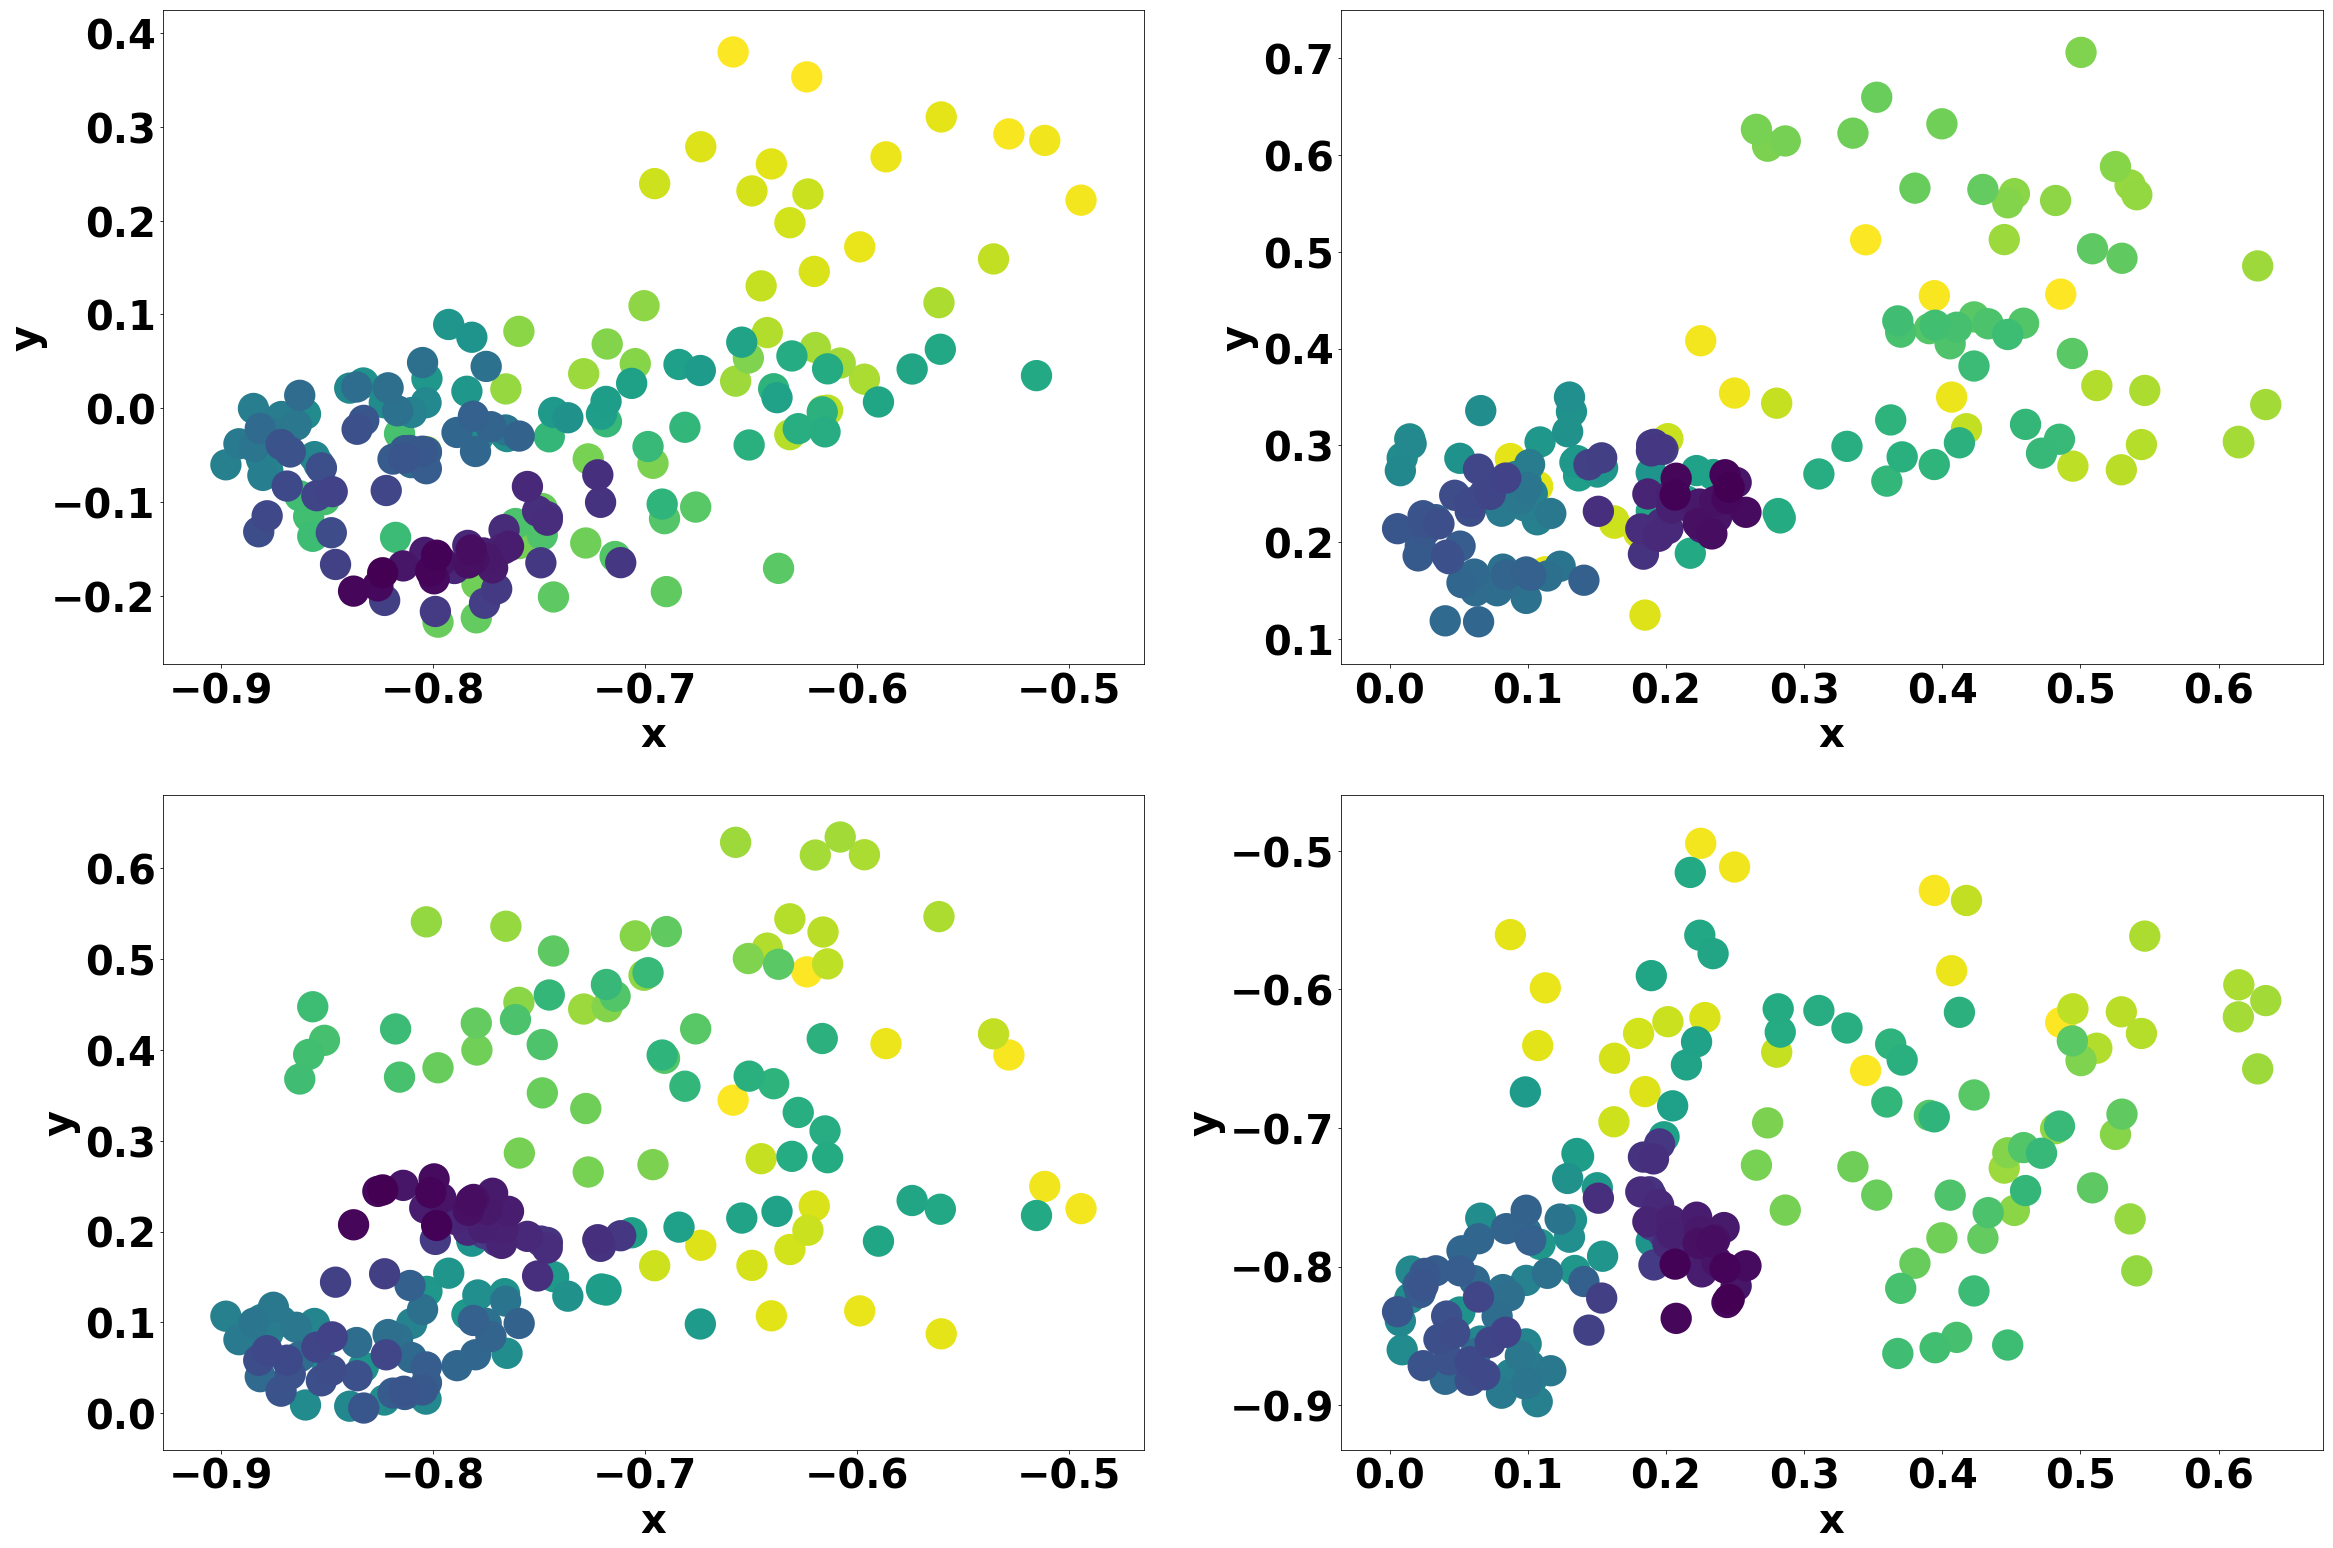

In [202]:
k = 0
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0,right =5,bottom = 0, top=5)

for m in mlist:
    ax = axs[k//2, k%2]
    k = k+1
    ax.set_autoscale_on(True)
    ax.set_ylabel('y',fontdict=font)
    ax.set_xlabel('x',fontdict=font)
    ax.scatter(means[:,(k*k+2)%4],means[:,(k+4)%5],300,c = -np.asarray([i for i in range(means.shape[0])]),linewidth=14)  
plt.show()


TypeError: list indices must be integers or slices, not tuple

/home/tamaz/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


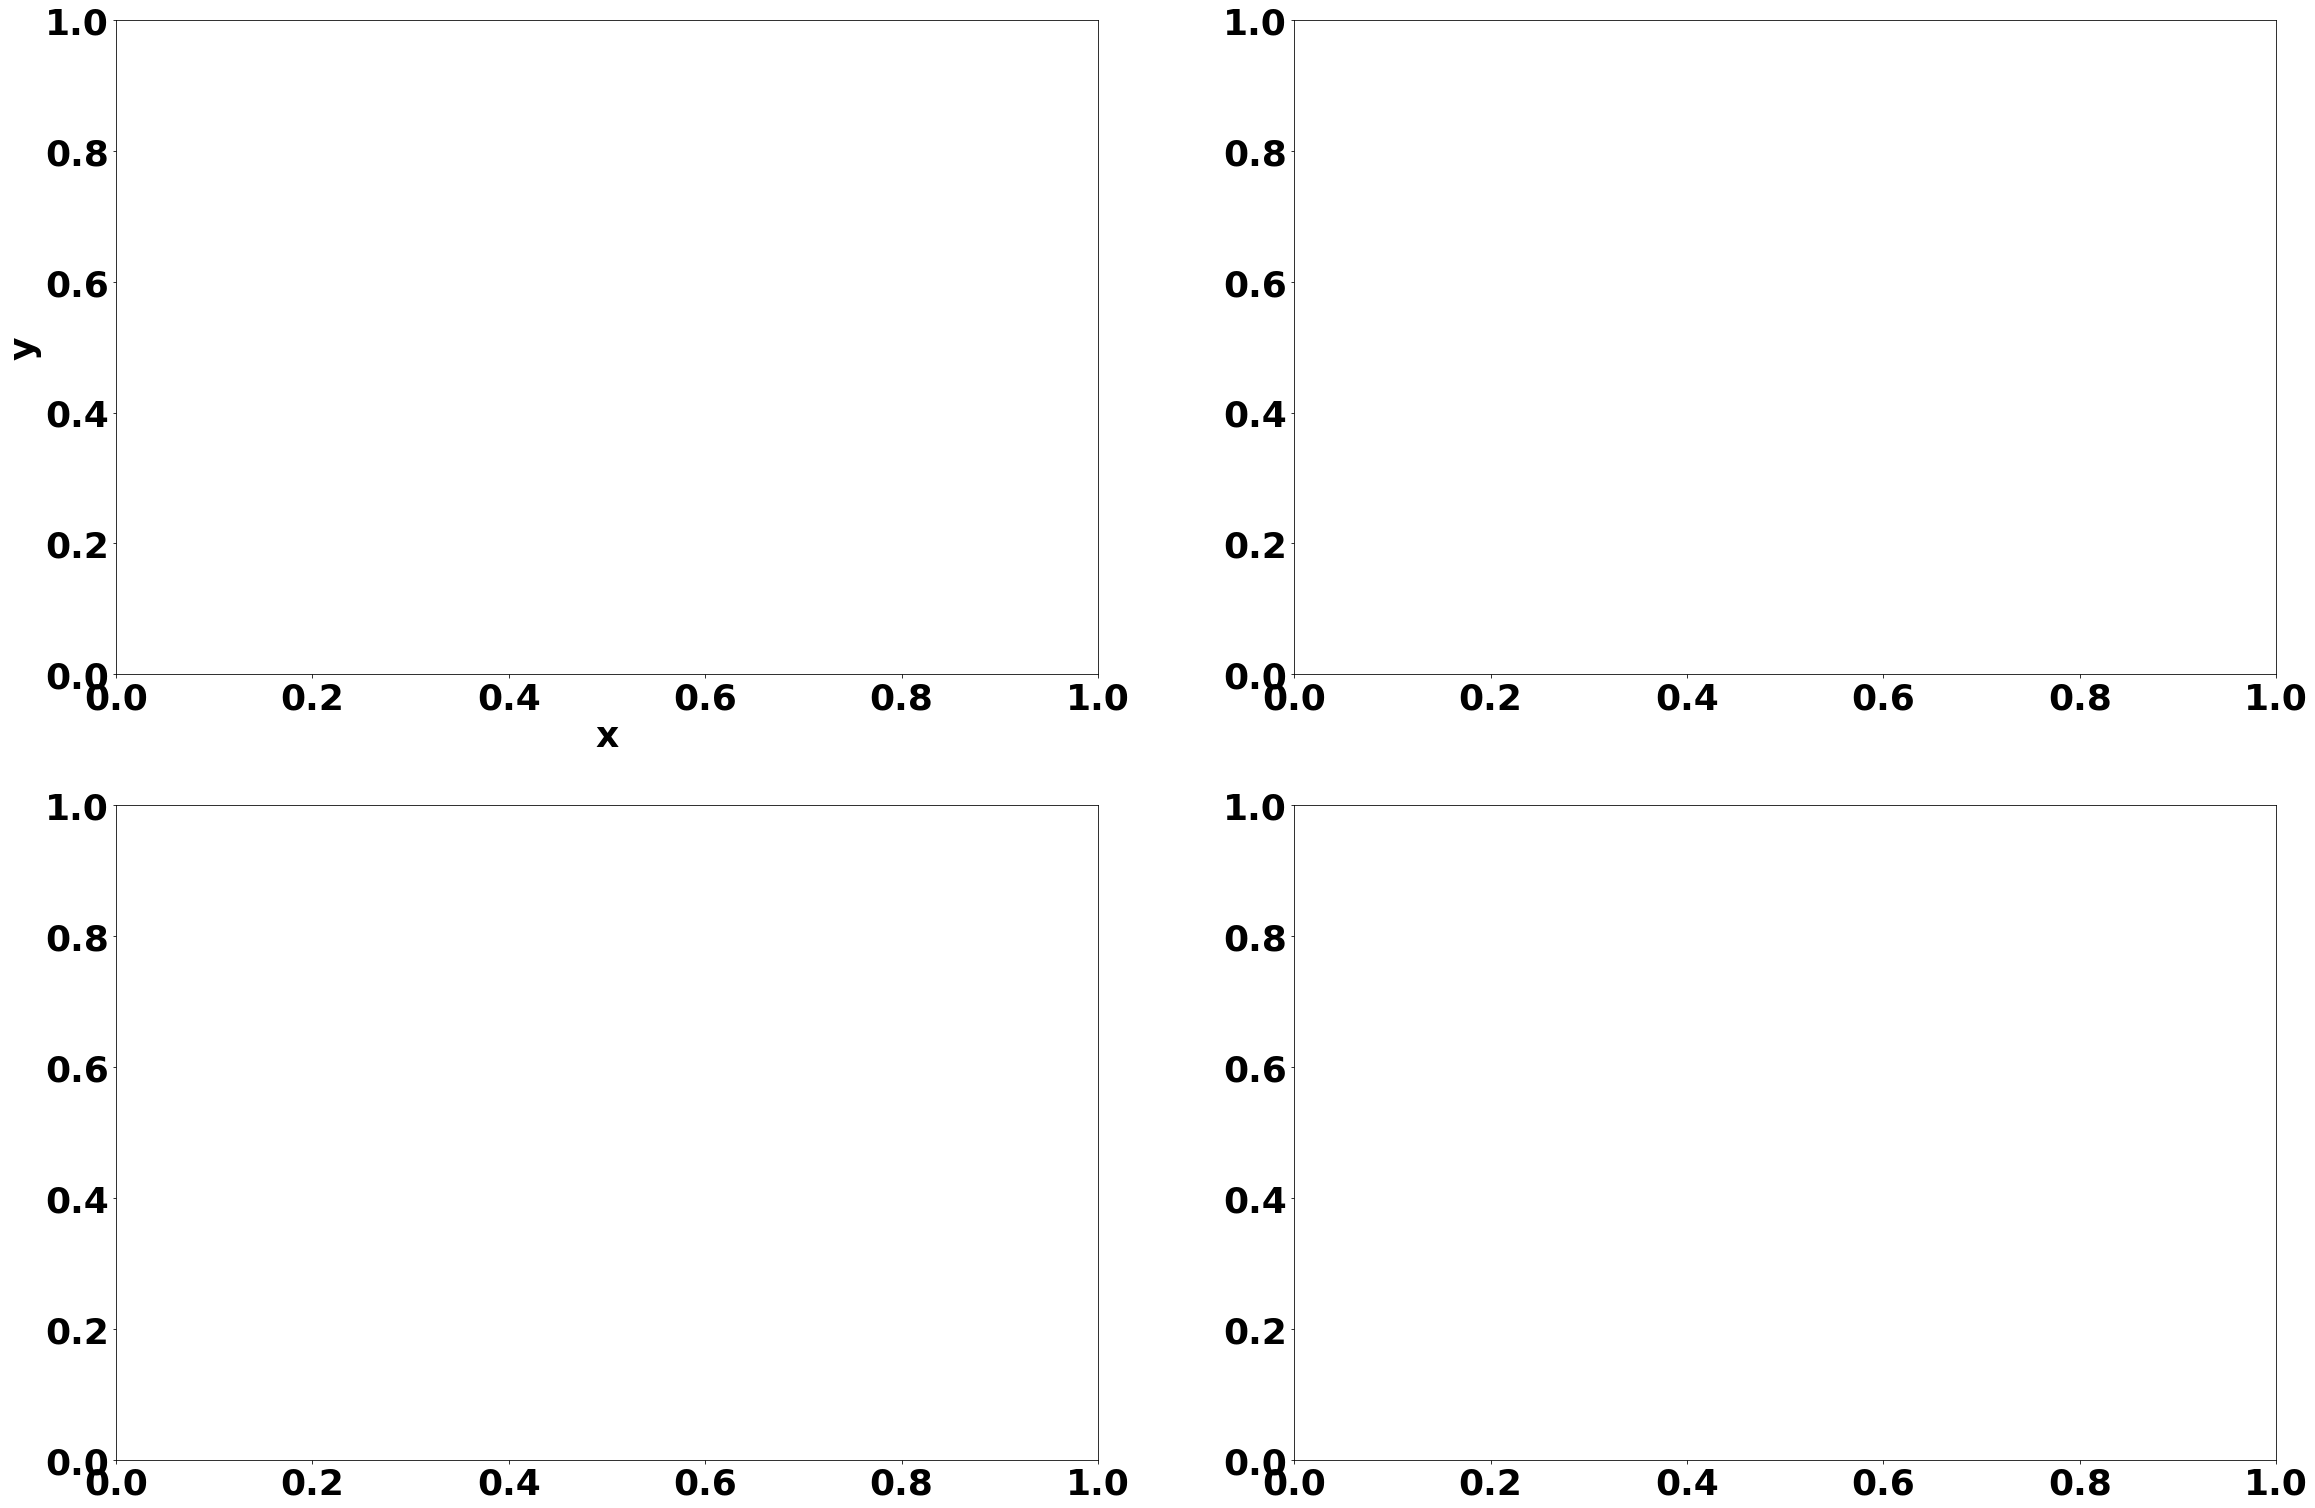

In [129]:
k = 0
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0,right =5,bottom = 0, top=5)

for m in mlist:
    ax = axs[k//2, k%2]
    k = k+1
    ax.set_autoscale_on(True)
    ax.set_ylabel('y',fontdict=font)
    ax.set_xlabel('x',fontdict=font)
    ax.scatter(divergence[:(k*k+1)%5],divergence[:,k%5],1000)  
plt.show()


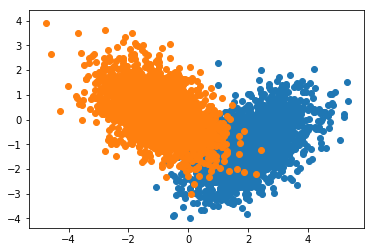

In [28]:
X=[]
for i in range(2):
    max_size = 2*1000
    m_1 = [2,-1]
    m_2 = [-1,0.3]
    random_state = 1
    a = np.random.multivariate_normal(m_1,np.asarray([[1,0.5],[0.5,1]]), max_size)
    b = np.random.multivariate_normal(m_2,np.asarray([[1,-0.5],[-0.5,1]]), max_size)
    X1 = []
    Y1 = []
    data = np.hstack([a,b]).reshape(-1,2)
    for i in data:
        X1.append(i)
        Y1.append(int(i in a))
    X1 = np.asarray(X1)
    Y1 = np.asarray(Y1)
    X.append(np.hstack([X1, Y1.reshape(-1,1)]))
Xtrain =X[0]
Xtest = X[1]
X = Xtrain[:,:-1]
y = Xtrain[:,-1]
X_t = Xtest[:,:-1]
y_t = Xtest[:,-1]
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])

In [209]:
def inv_pow(x,C,b):
    return C*(1 - np.exp(-b*x))

In [210]:
from scipy.optimize import curve_fit


In [211]:
curve_fit(inv_pow, x, divergence[1:])

/home/tamaz/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 3.5312526, 71.1121638]), array([[inf, inf],
        [inf, inf]]))

In [214]:
x = [i+1 for i in range(len(divergence)-1)]

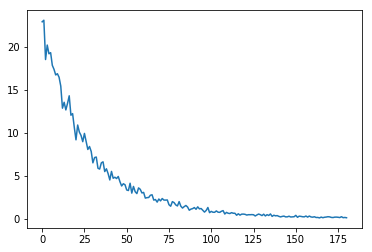

In [215]:
plt.plot(divergence)

In [212]:
akk = []
for i in range(len(x)):
    akk.append(inv_pow(x[i],3.5312526, 71.1121638))

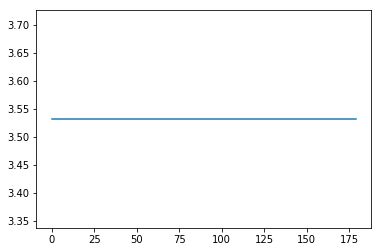

In [213]:
plt.plot(akk)